In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import *
import numpy as np
from sklearn.decomposition import *
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline

In [27]:
pd.options.display.max_columns = 999
pd.options.display.max_rows = 80

In [28]:
##Define the object for the season team
class MyDf:
    def __init__(self, mydf):
        self.df = mydf 

In [29]:
def select_season (df, season):
    return df[df['season']==season]

In [30]:
def cut_out_n_m_matches(df,n,m):
    a=df['H_ROUND'].unique()[n-1]
    b=df['H_ROUND'].unique()[-m]
    
    return df[(df['H_ROUND']>a) & (df['H_ROUND']<b)]
    

In [31]:
def train_test_index(df,predicted_season):
    train_index=df[df.season!=predicted_season].index
    test_index=df[df.season==predicted_season].index
    return train_index, test_index

In [32]:
def train_test_index_only_round(df,predicted_round):
    train_index=df[df['H_ROUND']<predicted_round].index
    test_index=df[df['H_ROUND']==predicted_round].index
    return train_index, test_index

In [33]:
def split_train_test_data(df,train_index,test_index,col_train,col_pred,i):
        
    X_train=df.loc[train_index].iloc[:,col_train]
    Y_train=df.loc[train_index][col_pred]
    
    X_test=df.loc[test_index]
    Y_test=df.loc[test_index]

    X_test=X_test[X_test.H_ROUND==i].iloc[:,col_train]
    Y_test=Y_test[Y_test.H_ROUND==i][col_pred]
     
   

    return X_train, Y_train, X_test, Y_test

In [34]:
def Predict_whole_season_by_one (BIG, predseason, col_train, col_pred, method, method_name):
        
    tmp=pd.DataFrame()
    
    train_index, test_index = train_test_index(BIG,predseason)
    lis=[]
    lis_2=[]
    lis_4=[]
    
    for i in BIG[BIG.season==predseason].H_ROUND.unique():
       
        X_train,Y_train,X_test,Y_test = split_train_test_data(BIG,train_index,test_index,col_train,col_pred,i) 
        method.fit(X_train,Y_train)
        lis_2=lis_2+list(method.predict(X_test))
        lis_4=lis_4+list(Y_test)
        lis.append(float(method.score(X_test, Y_test)))
        #print(X_test)
        #print(method.predict_proba(X_test))
        #print(Y_test)

    tmp[method_name]=lis 
    
    tmp_2=BIG.loc[list(test_index)].iloc[:,[1,2,3,4,8]]
    
    
    
    tmp_2['prediction']=lis_2
    tmp_2['real']=lis_4
    
    return tmp ,tmp_2

In [35]:
def Predict_whole_season_with_one (BIG, predseason, col_train, col_pred,method, method_name):
        
    tmp=pd.DataFrame()    
    
    train_index, test_index = train_test_index(BIG,predseason)
    lis=[]
    lis_2=[]

    
    for i in BIG[BIG.season==predseason].H_ROUND.unique():
       
        X_train,Y_train,X_test,Y_test = split_train_test_data(BIG,train_index,test_index,col_train,col_pred,i) 
        method.fit(X_train,Y_train)
        lis.append(float(method.score(X_test, Y_test)))
        
        train_index=list(train_index)+list(X_test.index)
       
    tmp[method_name]=lis     
    return tmp
    

In [178]:
def Predict_season_with_current_season (df, predseason, col_train, col_pred,method, method_name):
    
    tmp=pd.DataFrame()
    tmp_2=df[df['season']==predseason]
    lis=[]
    
    second_round=tmp_2['H_ROUND'].unique()[1]
    
        
    for i in range(int(df.H_ROUND.unique()[1]), int(df.H_ROUND.unique()[-1])):
        
        train_index, test_index = train_test_index_only_round(df,i)
        
        X_train=df.loc[train_index].iloc[:,col_train]
        Y_train=df.loc[train_index][col_pred]


        
        X_test=df.loc[test_index].iloc[:,col_train]
        Y_test=df.loc[test_index][col_pred]
        
       
        method.fit(X_train,Y_train)
        
        lis.append(float(method.score(X_test, Y_test)))
        
       
    tmp[method_name]=lis     
    
    return tmp


In [37]:
def find_best_model (X,col_pred,col_train,method):
    n=100
    from sklearn.cross_validation import train_test_split
    tmp=0
    for i in range(n):
        X_train, X_test, y_train, y_test = train_test_split(X.iloc[:,column_to_use_as_prediction], X[col_pred], test_size=0.20)
        method.fit(X_train,y_train)
        if method.score(X_test,y_test)>tmp:
            Best=method.fit(X_train,y_train)
    return Best

In [38]:
def pred_all_meth (df, season_to_be_predicted,column_to_predict,column_to_use_as_prediction):
    
    lis=[]
    
    print(3)
    
    #column_to_use_as_prediction = [22,18,51,49,42,20]
    #column_to_predict='Goal/No_Goal'
    
    svm_linear = svm.SVC(kernel='linear')
    lis.append(MyDf(Predict_whole_season_by_one(df,season_to_be_predicted,column_to_use_as_prediction,column_to_predict, svm_linear,'svm_linear_1')))
    lis.append(MyDf(Predict_whole_season_with_one(df,season_to_be_predicted,column_to_use_as_prediction,column_to_predict, svm_linear,'svm_linear_2')))
    #lis.append(MyDf(Predict_season_with_current_season(df,season_to_be_predicted, column_to_use_as_prediction, column_to_predict,svm_linear,'svm_linear_3')))    
    
    #column_to_use_as_prediction = [22,18,51,49,42,20]
    #column_to_predict='Goal/No_Goal'
    
    svm_rbf = svm.SVC(kernel='rbf', gamma = 100)
    lis.append(MyDf(Predict_whole_season_by_one(df,season_to_be_predicted,column_to_use_as_prediction,column_to_predict,svm_rbf,'svm_rbf_1')))
    lis.append(MyDf(Predict_whole_season_with_one(df,season_to_be_predicted,column_to_use_as_prediction,column_to_predict, svm_rbf,'svm_rbf_2')))
    #lis.append(MyDf(Predict_season_with_current_season(df,season_to_be_predicted,column_to_use_as_prediction,column_to_predict,svm_rbf,'svm_rbf_3')))

    
    
    #column_to_use_as_prediction = [22,18,51,49,42,20]
    #column_to_predict = 'Goal/No_Goal'  
               
    #dtc = DecisionTreeClassifier()
    #lis.append(MyDf(Predict_whole_season_by_one(df,season_to_be_predicted,column_to_use_as_prediction,column_to_predict, dtc,'dtc_1')))
    #lis.append(MyDf(Predict_whole_season_with_one(df,season_to_be_predicted,column_to_use_as_prediction,column_to_predict, dtc,'dtc_2')))
    #lis.append(MyDf(Predict_season_with_current_season(df,season_to_be_predicted,column_to_use_as_prediction,column_to_predict, dtc,'dtc_3')))

    
    
    #column_to_use_as_prediction=[22,18,51,49,42,20]
    #column_to_predict='Goal/No_Goal'  
               
    #bagb = AdaBoostClassifier(DecisionTreeClassifier(max_depth=10), n_estimators=20)
    #lis.append(MyDf(Predict_whole_season_by_one(df,season_to_be_predicted,column_to_use_as_prediction,column_to_predict, bagb,'bagb_1')))
    #lis.append(MyDf(Predict_whole_season_with_one(df,season_to_be_predicted,column_to_use_as_prediction,column_to_predict, bagb,'bagb_2')))
    #lis.append(MyDf(Predict_season_with_current_season(df,season_to_be_predicted,column_to_use_as_prediction,column_to_predict, bagb,'bagb_3')))          
               
    
    #column_to_use_as_prediction=[22,18,51,49,42,20]
    #column_to_predict='Goal/No_Goal'           
               
    #gradb = GradientBoostingClassifier(max_depth=10, n_estimators=20)
    #lis.append(MyDf(Predict_whole_season_by_one(df,season_to_be_predicted,column_to_use_as_prediction,column_to_predict, gradb,'gradb_1')))
    #lis.append(MyDf(Predict_whole_season_with_one(df,season_to_be_predicted,column_to_use_as_prediction,column_to_predict, gradb,'gradb_2')))
    #lis.append(MyDf(Predict_season_with_current_season(df,season_to_be_predicted,column_to_use_as_prediction,column_to_predict, gradb,'gradb_3')))         
   
                    
    
    #column_to_use_as_prediction=[22,18,51,49,42,20]
    #column_to_predict='Goal/No_Goal'  
                    
    Ardf = AdaBoostClassifier(RandomForestClassifier(max_depth=10, n_estimators=20))
    lis.append(MyDf(Predict_whole_season_by_one(df,season_to_be_predicted,column_to_use_as_prediction,column_to_predict, Ardf,'rdf_1')))
    lis.append(MyDf(Predict_whole_season_with_one(df,season_to_be_predicted,column_to_use_as_prediction,column_to_predict, Ardf,'rdf_2')))
    #lis.append(MyDf(Predict_season_with_current_season(df,season_to_be_predicted,column_to_use_as_prediction,column_to_predict, rdf,'rdf_3')))
    
    
    
    return lis

In [39]:
def Put_Togheter (lis):
    tmp=pd.DataFrame()
    for i in range(len(lis)):
        tmp=tmp.join(lis[i].df, how='outer')
        
    return tmp

# Loading data

In [375]:
final=pd.read_csv('../Data/from_sqlite_Data/Realfinal.csv')
final.drop('Unnamed: 0',axis=1,inplace=True)
allchampionships=[]

In [41]:
percentages=pd.read_csv('../Data/1x2_all_leagues')
percentages

,Unnamed: 0,Switzerland Super League,Poland Ekstraklasa,Scotland Premier League,France Ligue 1,Germany 1. Bundesliga,England Premier League,Belgium Jupiler League,Portugal Liga ZON Sagres,Netherlands Eredivisie,Italy Serie A,Spain LIGA BBVA
0,0,0.452830,0.454812,0.429167,0.444583,0.454885,0.460899,0.467764,0.442890,0.486371,0.466056,0.493539
1,1,0.243486,0.275235,0.240972,0.288333,0.243994,0.258735,0.239369,0.254662,0.230893,0.267805,0.227178
2,2,0.303684,0.269953,0.329861,0.267083,0.301121,0.280366,0.292867,0.302448,0.282737,0.266139,0.279283


In [42]:
for i in range(len(final.country_id.unique())):
    allchampionships.append(MyDf(final[final['country_id']==final.country_id.unique()[i]].sort(columns='Date')))
    allchampionships[i].df.reset_index(inplace=True)
    allchampionships[i].df.drop(['index'],axis=1,inplace=True)

/Users/nicolamacchitella/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


In [44]:
premier_2017=pd.read_csv('../Data/from_sqlite_Data/Premier_realfinal.csv')

In [45]:
premier_2017

,Unnamed: 0,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,season,H_ROUND,H_TP3,H_TP5,H_GS_H,H_GS_A,H_GR_H,H_GR_A,H_TGS,H_TGR,H_AvGS_H,H_AvGS_A,H_AvGR_H,H_AvGR_A,H_Av_TGS,H_Av_TGR,H_Pnt_H,H_Pnt_A,H_T_pnt,H_Av_Pnt_H,H_Av_pnt_A,H_Av_T_pnt,A_ROUND,A_TP3,A_TP5,Aw_GS_H,Aw_GS_A,Aw_GR_H,Aw_GR_A,Aw_TGS,Aw_TGR,Aw_AvGS_H,Aw_AvGS_A,Aw_AvGR_H,Aw_AvGR_A,Aw_Av_TGS,Aw_Av_TGR,Aw_Pnt_H,Aw_Pnt_A,Aw_T_pnt,Aw_Av_Pnt_H,Aw_Av_pnt_A,Aw_Av_T_pnt,DIFF_TP,DIFF_HP-AP,SUMM_HGSH+HGSH+AGRA,SUMM_HGRH+AGSA,SUMM_HTGS+ATGR,SUMM_HTGR+ATGS,DIFF_L3MP,DIFF_L5MP,DIFF_av_TP,DIFF_av_HP-AP,SUMM_av_HGSH+AGRA,SUMM_av_HGRH+AGSA,SUMM_av_HTGS+ATGR,SUMM_av_HTGR+ATGS,Goal/No_Goal,Over2.5/Under2.5,Over1.5/Under1.5
0,0,13/08/16,Burnley,Swansea,0,1,A,2016/2017,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0
1,1,13/08/16,Crystal Palace,West Brom,0,1,A,2016/2017,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0
2,2,13/08/16,Everton,Tottenham,1,1,D,2016/2017,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,0,1
3,3,13/08/16,Hull,Leicester,2,1,H,2016/2017,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,1,1
4,4,13/08/16,Man City,Sunderland,2,1,H,2016/2017,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,1,1
5,5,13/08/16,Middlesbrough,Stoke,1,1,D,2016/2017,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,0,1
6,6,13/08/16,Southampton,Watford,1,1,D,2016/2017,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,0,1
7,7,14/08/16,Arsenal,Liverpool,3,4,A,2016/2017,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,1,1
8,8,14/08/16,Bournemouth,Man United,1,3,A,2016/2017,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.

# Cut out first and last n,m matches

In [2119]:
n=4
m=4

In [2120]:
for i in range(len(final.country_id.unique())):
    allchampionships[i].df=cut_out_n_m_matches(allchampionships[i].df,n,m)
    

In [2121]:
pd.DataFrame(allchampionships[0].df.columns)

,0
0,country_id
1,season
2,Date
3,HomeTeam
4,AwayTeam
5,FTHG
6,FTAG
7,B365H
8,B365D
9,B365A


# Parameter

In [2122]:
season_to_be_predicted='2015/2016'
column_to_predict='FTR'
column_to_use_as_prediction = [7,8,9]

# RUN with all method only ONE LEAGUE

In [2126]:
a=pred_all_meth(allchampionships[9].df, season_to_be_predicted,column_to_predict,column_to_use_as_prediction)

3


In [179]:
svm_linear=SVC(kernel='linear')
#Predict_season_with_current_season(allchampionships[9].df, season_to_be_predicted,column_to_predict,column_to_use_as_prediction,svm_linear,'svm')

In [2131]:
svm_linear


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

## Put together

In [180]:
#b=Put_Togheter(a)

In [ ]:
b

In [ ]:
b.mean()

## Get Means and Best Methods

In [773]:
for i in range(len(b.mean()[b.mean()==max(b.mean())])):
    print ('Best method are', b.mean()[b.mean()==max(b.mean())].index[i], 'with score', b.mean()[b.mean()==max(b.mean())][i])


('Best method are', 'svm_linear_1', 'with score', 0.37375073486184601)
('Best method are', 'svm_linear_2', 'with score', 0.37375073486184601)
('Best method are', 'svm_rbf_1', 'with score', 0.37375073486184601)
('Best method are', 'svm_rbf_2', 'with score', 0.37375073486184601)


# Run all methods ALL LEAGUES 

In [1284]:
def FINAL (df,season_to_be_predicted,column_to_predict,column_to_use_as_prediction):
    lis=[]
    tmp=pd.DataFrame(columns=[u'svm_linear_1', u'svm_linear_2', u'svm_linear_3', u'svm_rbf_1',
       u'svm_rbf_2', u'svm_rbf_3', u'dtc_1', u'dtc_2', u'dtc_3', u'bagb_1',
       u'bagb_2', u'bagb_3', u'gradb_1', u'gradb_2', u'gradb_3', u'rdf_1',
       u'rdf_2', u'rdf_3'])
    
    for i in range(len(df)):
        #print(i)
        #print(allchampionships[i].df['country_id'].iloc[0])
        
        a=(pred_all_meth(df[i].df, season_to_be_predicted,column_to_predict,column_to_use_as_prediction))
        b=Put_Togheter(a)
        #print(b.mean())
        tmp=tmp.append(b.mean(), ignore_index=True)
        #print(tmp)
    
    '''tmp.index=['Switzerland Super League', 'Poland Ekstraklasa',
       'Scotland Premier League', 'France Ligue 1',
       'Germany 1. Bundesliga', 'England Premier League',
       'Belgium Jupiler League', 'Portugal Liga ZON Sagres',
       'Netherlands Eredivisie', 'Italy Serie A', 'Spain LIGA BBVA']
    '''
    return tmp
        
        
    

In [1286]:
G=FINAL(allchampionships,season_to_be_predicted,column_to_predict,column_to_use_as_prediction)

TypeError: %d format: a number is required, not str

In [2030]:
G.mean()

svm_linear_1    0.515862
svm_linear_2    0.514887
svm_linear_3    0.520850
svm_rbf_1       0.514341
svm_rbf_2       0.510355
svm_rbf_3       0.520230
dtc_1           0.498377
dtc_2           0.497134
dtc_3           0.502849
bagb_1          0.518391
bagb_2          0.492440
bagb_3          0.508048
gradb_1         0.502022
gradb_2         0.516965
gradb_3         0.506086
rdf_1           0.501985
rdf_2           0.510169
rdf_3           0.516365
dtype: float64

## Get The best Methods and Scores for Each League

In [ ]:
for i in range(len(G)):
    
    for i in range(G.iloc[i])
    print ('Best method are', b.mean()[b.mean()==max(b.mean())].index[i], 'with score', b.mean()[b.mean()==max(b.mean())][i])

    print ('Best Methods for' )
    

## SVM_LINEAR

In [495]:
svm_linear = svm.SVC(kernel='linear')
a=Predict_whole_season_by_one(allchampionships[0].df,season_to_be_predicted,column_to_use_as_prediction,column_to_predict, svm_linear,'svm_linear')

In [496]:
b=Predict_whole_season_with_one(allchampionships[0].df,season_to_be_predicted,column_to_use_as_prediction,column_to_predict, svm_linear,'svm_linear')

In [497]:
c=Predict_season_with_current_season(allchampionships[0].df,season_to_be_predicted, column_to_use_as_prediction, column_to_predict,svm_linear,'svm_linear')

In [498]:
a['svm_linear'].mean()

0.5162414965986394

In [499]:
b['svm_linear'].mean()

0.5733843537414965

In [500]:
c['svm_linear'].mean()

0.5402483852432872

## SVM_RBF


In [501]:
svm_rbf = svm.SVC(kernel='rbf', gamma = 100)
a=Predict_whole_season_w_one(premier_2017,'2016',column_to_use_as_prediction,column_to_predict,svm_rbf,'svm_rbf')

In [502]:
b=Predict_whole_season_with_one(allchampionships[0].df,season_to_be_predicted,column_to_use_as_prediction,column_to_predict, svm_rbf,'svm_rbf')

In [356]:
c=Predict_season_with_current_season(premier_2017[premier_2017['ELO_DIFF']>90],'2016/2017', [68,69,70,71], 'FTR',svm_rbf,'svm_rbf')

In [353]:
c.mean()

svm_rbf    0.755208
dtype: float64

In [355]:
len(premier_2017[premier_2017['ELO_DIFF']>90])

88

In [370]:
final

,country_id,season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,H_ROUND,H_TP3,H_TP5,H_GS_H,H_GS_A,H_GR_H,H_GR_A,H_TGS,H_TGR,H_AvGS_H,H_AvGS_A,H_AvGR_H,H_AvGR_A,H_Av_TGS,H_Av_TGR,H_Pnt_H,H_Pnt_A,H_T_pnt,H_Av_Pnt_H,H_Av_pnt_A,H_Av_T_pnt,A_ROUND,A_TP3,A_TP5,Aw_GS_H,Aw_GS_A,Aw_GR_H,Aw_GR_A,Aw_TGS,Aw_TGR,Aw_AvGS_H,Aw_AvGS_A,Aw_AvGR_H,Aw_AvGR_A,Aw_Av_TGS,Aw_Av_TGR,Aw_Pnt_H,Aw_Pnt_A,Aw_T_pnt,Aw_Av_Pnt_H,Aw_Av_pnt_A,Aw_Av_T_pnt,DIFF_TP,DIFF_HP-AP,SUMM_HGSH+HGSH+AGRA,SUMM_HGRH+AGSA,SUMM_HTGS+ATGR,SUMM_HTGR+ATGS,DIFF_L3MP,DIFF_L5MP,DIFF_av_TP,DIFF_av_HP-AP,SUMM_av_HGSH+AGRA,SUMM_av_HGRH+AGSA,SUMM_av_HTGS+ATGR,SUMM_av_HTGR+ATGS,Goal/No_Goal,Over2.5/Under2.5,Over1.5/Under1.5
0,Switzerland Super League,2008/2009,2008-07-18 00:00:00,BSC Young Boys,FC Basel,1,2,A,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,1,1
1,Switzerland Super League,2008/2009,2008-07-19 00:00:00,FC Aarau,FC Sion,3,1,H,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,1,1
2,Switzerland Super League,2008/2009,2008-07-20 00:00:00,FC Luzern,FC Vaduz,1,2,A,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,1,1
3,Switzerland Super League,2008/2009,2008-07-20 00:00:00,Neuchâtel Xamax,FC Zürich,1,2,A,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,1,1
4,Switzerland Super League,2008/2009,2008-07-23 00:00:00,AC Bellinzona,Neuchâtel Xamax,1,2,A,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,2.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,2.0,1.000000,0.000000,2.000000,0.000000,1.000000,2.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1,1,1
5,Switzerland Super League,2008/2009,2008-07-23 00:00:00,FC Basel,Grasshopper Club Zürich,1,0,H,2.0,3.0,3.0,0.0,2.0,0.0,1.0,2.0,1.0,0.000000,2.000000,0.000000,1.000000,2.000000,1.000000,0.0,3.0,3.0,0.000000,3.000000,3.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,3.0,0.0,0.0,0.0,2.0,1.0,3.0,3.0,3.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0,0,0
6,Switzerland Super League,2008/2009,2008-07-23 00:00:00,FC Zürich,FC Luzern,1,0,H,2.0,3.0,3.0,0.0,2.0,0.0,1.0,2.0,1.0,0.000000,2.000000,0.000000,1.000000,2.000000,1.000000,0.0,3.0,3.0,0.000000,3.000000,3.000000,2.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,2.0,1.000000,0.000000,2.000000,0.000000,1.000000,2.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,3.0,0.0,0.0,0.0,4.0,2.0,3.0,3.0,3.000000,0.000000,0.000000,0.000000,4.000000,2.000000,0,0,0
7,Switzerland Super League,2008/2009,2008-07-24 00:00:00,FC Sion,BSC Young Boys,2,1,H,2.0,0.0,0.0,0.0,1.0,0.0,3.0,1.0,3.0,0.000000,1.000000,0.000000,3.000000,1.000000,3.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,2.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,2.0,1.000000,0.000000,2.00000

In [407]:
import matplotlib.pyplot as plt
%matplotlib inline

#plt.plot(final['B365H'].type(float),e, 'o')

In [343]:
import math
math.exp

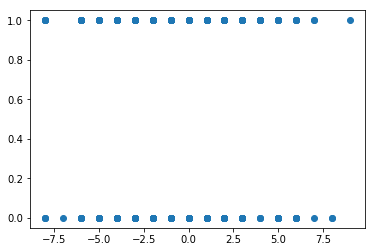

In [408]:
plt.plot(premier_2017['DIFF_L3MP'],premier_2017['Goal/No_Goal'], 'o')

In [381]:
e=(final['FTR']=='H')*1 + (final['FTR']=='D')*0 + (final['FTR']=='A')*(-1)

In [413]:
import difflib
words = ['hello', 'Hallo', 'hi', 'house', 'key', 'screen', 'hallo', 'question', 'format']
difflib.get_close_matches('Hello', words)
['hello', 'Hallo', 'hallo']

['hello', 'Hallo', 'hallo']

## CART

In [505]:
dtc = DecisionTreeClassifier()
d=Predict_whole_season_by_one(allchampionships[0].df,season_to_be_predicted,column_to_use_as_prediction,column_to_predict, dtc,'dtc')

e=Predict_whole_season_with_one(allchampionships[0].df,season_to_be_predicted,column_to_use_as_prediction,column_to_predict, dtc,'dtc')

t=Predict_whole_season_with_one(allchampionships[0].df,season_to_be_predicted,column_to_use_as_prediction,column_to_predict, dtc,'dtc')


In [507]:
d['dtc'].mean()

0.43792517006802717

In [508]:
e['dtc'].mean()

0.5260204081632655

In [509]:
#a.join(e, how='outer')

# Adaboost Classifier 

In [510]:
bagb = AdaBoostClassifier(DecisionTreeClassifier(max_depth=10), n_estimators=20)
a=Predict_whole_season_by_one(allchampionships[0].df,season_to_be_predicted,column_to_use_as_prediction,column_to_predict, bagb,'bagb')
b=Predict_whole_season_with_one(allchampionships[0].df,season_to_be_predicted,column_to_use_as_prediction,column_to_predict, bagb,'bagb')
c=Predict_whole_season_with_one(allchampionships[0].df,season_to_be_predicted,column_to_use_as_prediction,column_to_predict, bagb,'bagb')

In [512]:
a['bagb'].mean()

0.5034863945578232

In [513]:
b['bagb'].mean()

0.5394557823129251

# Gradient Boosting Classifier


In [514]:
gradb = GradientBoostingClassifier(max_depth=10, n_estimators=20)
a=Predict_whole_season_by_one(allchampionships[0].df,season_to_be_predicted,column_to_use_as_prediction,column_to_predict, gradb,'gradb')
b=Predict_whole_season_with_one(allchampionships[0].df,season_to_be_predicted,column_to_use_as_prediction,column_to_predict, gradb,'gradb')
c=Predict_whole_season_with_one(allchampionships[0].df,season_to_be_predicted,column_to_use_as_prediction,column_to_predict, gradb,'gradb')

In [516]:
a['gradb'].mean()

0.4739795918367347

In [517]:
b['gradb'].mean()

0.536734693877551

# Random Forest

In [518]:
rdf = RandomForestClassifier(max_depth=10, n_estimators=20)
a=Predict_whole_season_by_one(allchampionships[0].df,season_to_be_predicted,column_to_use_as_prediction,column_to_predict, rdf,'rdf')

In [519]:
b=Predict_whole_season_with_one(allchampionships[0].df,season_to_be_predicted,column_to_use_as_prediction,column_to_predict, rdf,'rdf')

In [520]:
a['rdf'].mean()

0.5062925170068027

In [521]:
b['rdf'].mean()

0.486139455782313

# Working on sureness

In [826]:
df=allchampionships[0].df
df=df[df['season']==season_to_be_predicted]


In [827]:
for i in range(7,30):
    X_train=df[df.H_ROUND<i].iloc[:,column_to_use_as_prediction]
    Y_train=df[df.H_ROUND<i][column_to_predict]
    X_test=df[df.H_ROUND==i].iloc[:,column_to_use_as_prediction]
    Y_test=df[df.H_ROUND==i][column_to_predict]
    svm_linear = svm.SVC(kernel='linear')
    svm_linear.fit(X_train,Y_train)
    print(svm_linear.decision_function(X_test))
    #print(svm_linear.predict(X_test))
    #print(svm_linear.score(X_test,Y_test))
    #print(Y_test)
    

/Users/nicolamacchitella/anaconda/lib/python2.7/site-packages/sklearn/svm/base.py:552: ChangedBehaviorWarning: The decision_function_shape default value will change from 'ovo' to 'ovr' in 0.19. This will change the shape of the decision function returned by SVC.
  "SVC.", ChangedBehaviorWarning)


[[  1.4         -0.47385034  -2.6       ]
 [  1.          -0.15799586  -1.8       ]
 [  4.2          0.78956758  -4.6       ]
 [ 13.4          3.94811239 -12.2       ]
 [  1.          -0.15799586  -1.8       ]]
[[  3.4          1.0000357   -3.        ]
 [ 13.4         -0.99942882 -12.2       ]
 [  1.           1.57137247  -0.6       ]
 [  4.2         -0.14317333  -5.8       ]
 [ -1.4          0.99939312  -0.6       ]]
[[-0.33309724  1.22253381  2.        ]
 [ 0.99988196  0.55547167 -1.        ]
 [ 3.22186809  0.11097929 -4.33333333]
 [-3.22210418  0.99964048  4.33333333]
 [-0.99976391  1.22242595  2.66666667]]
[[ 7.4        -1.15875238 -0.9998161 ]
 [ 5.4        -1.31766032 -1.00001314]
 [ 5.2        -0.90487302 -0.99985551]
 [-2.4         0.4917746  -0.9997767 ]
 [ 7.4        -1.15875238 -0.9998161 ]]
[[ 1.         -0.59100457 -1.        ]
 [ 1.         -0.95391731 -1.        ]
 [ 1.         -1.31882001 -1.        ]
 [ 1.          0.22654408 -1.        ]
 [ 1.         -0.63686615 -1. 

In [142]:
pd.read_csv('../Data/from_sqlite_Data/Team.csv')

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673,KRC Genk,GEN
1,2,9993,675,Beerschot AC,BAC
2,3,10000,15005,SV Zulte-Waregem,ZUL
3,4,9994,2007,Sporting Lokeren,LOK
4,5,9984,1750,KSV Cercle Brugge,CEB
5,6,8635,229,RSC Anderlecht,AND
6,7,9991,674,KAA Gent,GEN
7,8,9998,1747,RAEC Mons,MON
8,9,7947,<null>,FCV Dender EH,DEN
9,10,9985,232,Standard de Liège,STL


# For Real Betting!

In [60]:
premier_2017=pd.read_csv('../Data/from_sqlite_Data/Premier_realfinal.csv')

In [304]:
pd.DataFrame(premier_2017[premier_2017.Date=='2017-04-28 00:00:00'].columns)

,0
0,Unnamed: 0
1,Date
2,HomeTeam
3,AwayTeam
4,FTHG
5,FTAG
6,FTR
7,season
8,H_ROUND
9,H_TP3


In [305]:
column_to_predict='FTR'
column_to_use_as_prediction=[60,61,62,63,69,70]

In [189]:
X_train=premier_2017[premier_2017.Date!='2017-04-28 00:00:00'].iloc[:,column_to_use_as_prediction]
Y_train=premier_2017[premier_2017.Date!='2017-04-28 00:00:00'][column_to_predict]

X_test=premier_2017[premier_2017.Date=='2017-04-28 00:00:00'].iloc[:,column_to_use_as_prediction]

In [190]:
svm_linear = svm.SVC(kernel='linear')
svm_linear.fit(X_train,Y_train)

svm_rbf=svm.SVC(kernel='rbf', gamma=10)
svm_rbf.fit(X_train,Y_train)

rdf = RandomForestClassifier(max_depth=10, n_estimators=20)
rdf.fit(X_train,Y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=20, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [191]:
svm_linear.predict(X_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [192]:
svm_rbf.predict(X_test)


array([1, 0, 0, 1, 1, 0, 0, 1, 1, 1])

In [193]:
rdf.predict(X_test)

array([1, 0, 1, 0, 1, 1, 0, 1, 1, 1])

In [137]:
import urllib


In [97]:
premier_2017.HomeTeam.unique()

array(['Burnley', 'Crystal Palace', 'Everton', 'Hull', 'Man City',
       'Middlesbrough', 'Southampton', 'Arsenal', 'Bournemouth', 'Chelsea',
       'Man United', 'Leicester', 'Stoke', 'Swansea', 'Tottenham',
       'Watford', 'West Brom', 'Sunderland', 'West Ham', 'Liverpool'], dtype=object)

In [101]:
url="http://api.clubelo.com/Barcelona"

In [104]:
!curl -O 'http://api.clubelo.com/Barcelona'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  265k  100  265k    0     0   162k      0  0:00:01  0:00:01 --:--:--  171k


In [119]:
import pandas as pd
import io
import requests
s=requests.get(url).content
c=pd.read_csv(io.StringIO(s.decode('utf-8')))

In [194]:
premier_2017.head(n=1)

,Unnamed: 0,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,season,H_ROUND,H_TP3,H_TP5,H_GS_H,H_GS_A,H_GR_H,H_GR_A,H_TGS,H_TGR,H_AvGS_H,H_AvGS_A,H_AvGR_H,H_AvGR_A,H_Av_TGS,H_Av_TGR,H_Pnt_H,H_Pnt_A,H_T_pnt,H_Av_Pnt_H,H_Av_pnt_A,H_Av_T_pnt,A_ROUND,A_TP3,A_TP5,Aw_GS_H,Aw_GS_A,Aw_GR_H,Aw_GR_A,Aw_TGS,Aw_TGR,Aw_AvGS_H,Aw_AvGS_A,Aw_AvGR_H,Aw_AvGR_A,Aw_Av_TGS,Aw_Av_TGR,Aw_Pnt_H,Aw_Pnt_A,Aw_T_pnt,Aw_Av_Pnt_H,Aw_Av_pnt_A,Aw_Av_T_pnt,DIFF_TP,DIFF_HP-AP,SUMM_HGSH+HGSH+AGRA,SUMM_HGRH+AGSA,SUMM_HTGS+ATGR,SUMM_HTGR+ATGS,DIFF_L3MP,DIFF_L5MP,DIFF_av_TP,DIFF_av_HP-AP,SUMM_av_HGSH+AGRA,SUMM_av_HGRH+AGSA,SUMM_av_HTGS+ATGR,SUMM_av_HTGR+ATGS,Goal/No_Goal,Over2.5/Under2.5,Over1.5/Under1.5
0,0,13/08/16,Burnley,Swansea,0.0,1.0,A,2016/2017,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0


In [284]:
a=pd.read_csv('../Data/elo/premier/elo_totale')

In [290]:
a['From']=pd.to_datetime(a['From'])
a['To']=pd.to_datetime(a['To'])

In [281]:
t.Date[8]

'14/08/16'

In [297]:
lis_home=[]
for i in premier_2017.index:
    tmp=a[a.Club==premier_2017['HomeTeam'][i]]
    lis_home.append(tmp[tmp['To'] >= pd.to_datetime(premier_2017.Date[i])].iloc[0]['Elo'])
    

In [298]:
lis_away=[]
for i in premier_2017.index:
    tmp=a[a.Club==premier_2017['AwayTeam'][i]]
    lis_away.append(tmp[tmp['To'] >= pd.to_datetime(premier_2017.Date[i])].iloc[0]['Elo'])
    
    

In [300]:
premier_2017['ELO_HOME']=lis_home
premier_2017['ELO_AWAY']=lis_away

In [309]:
premier_2017['ELO_DIFF']=premier_2017['ELO_HOME']-premier_2017['ELO_AWAY']